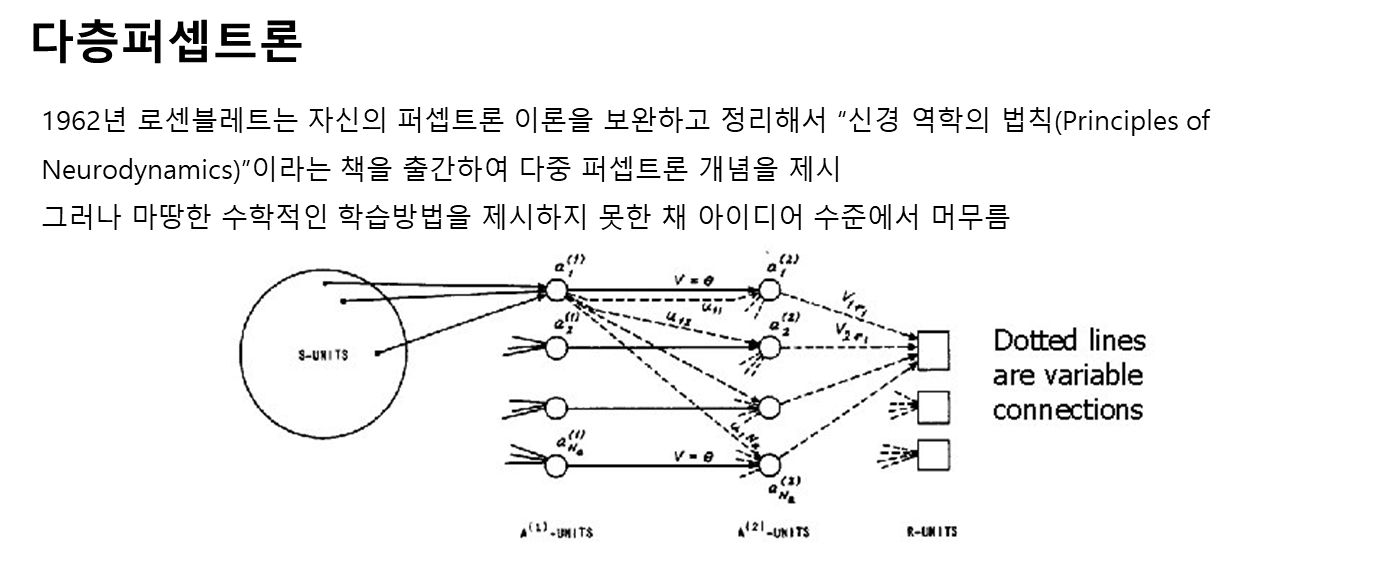

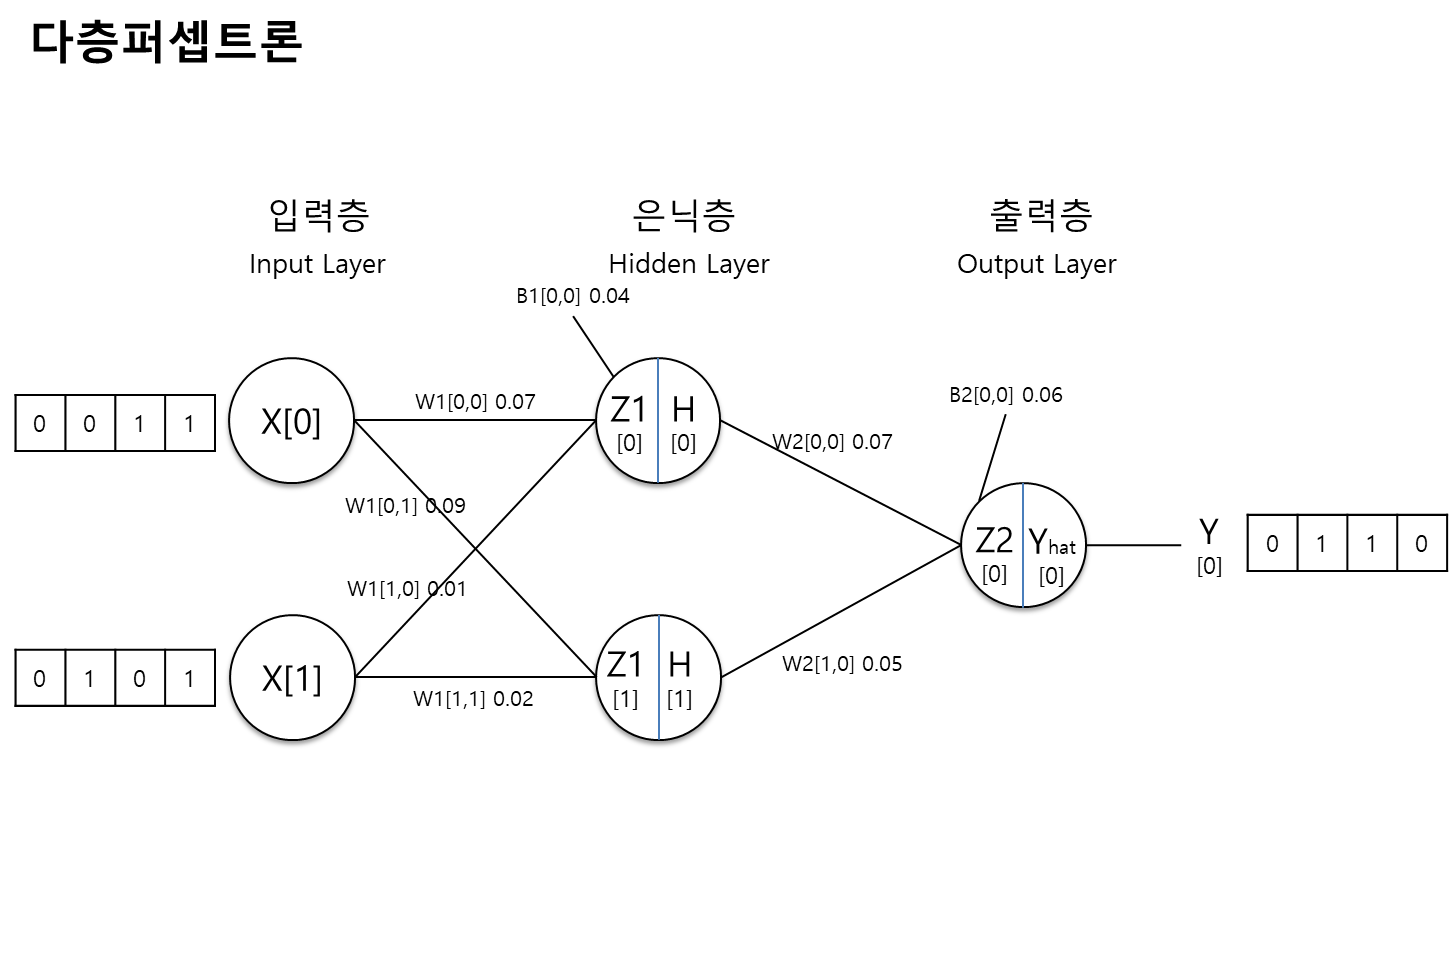

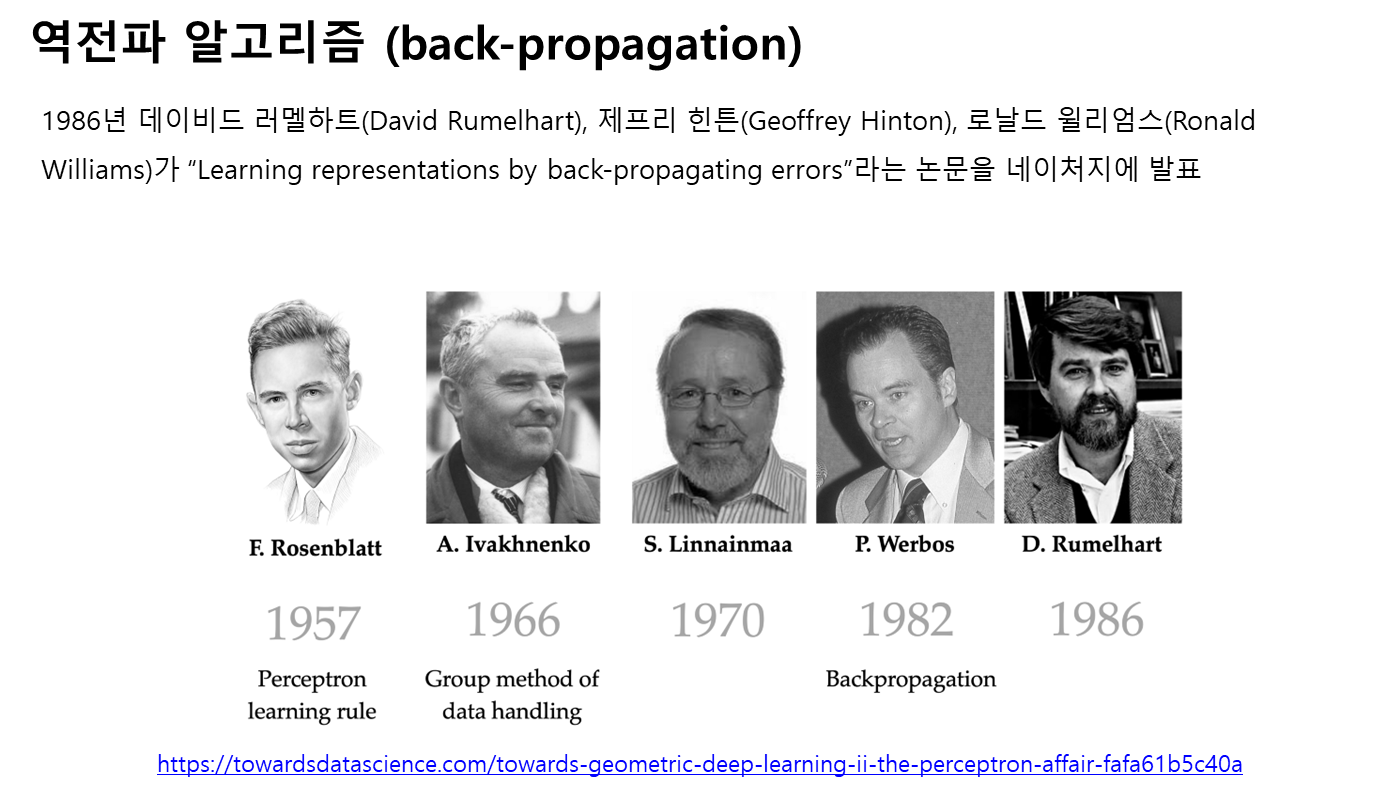

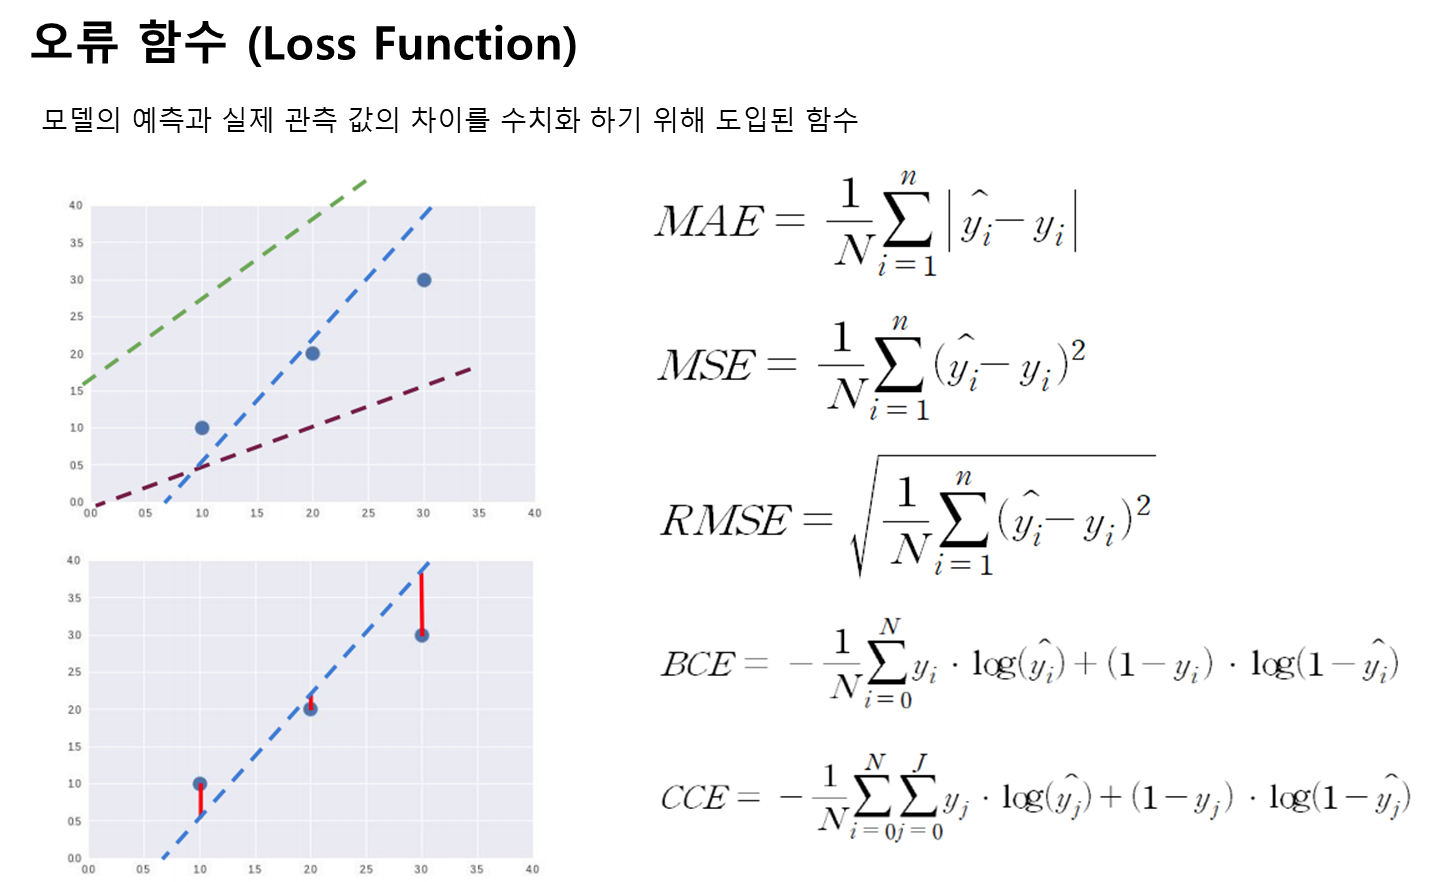

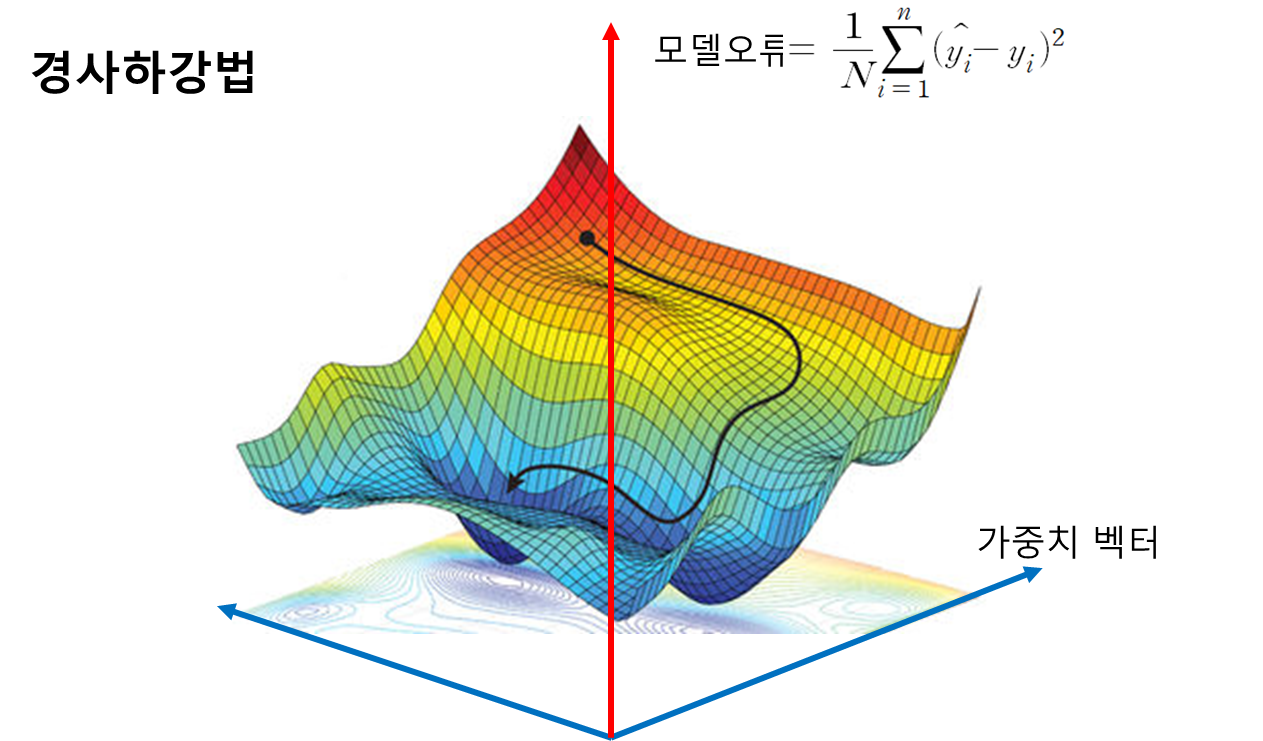

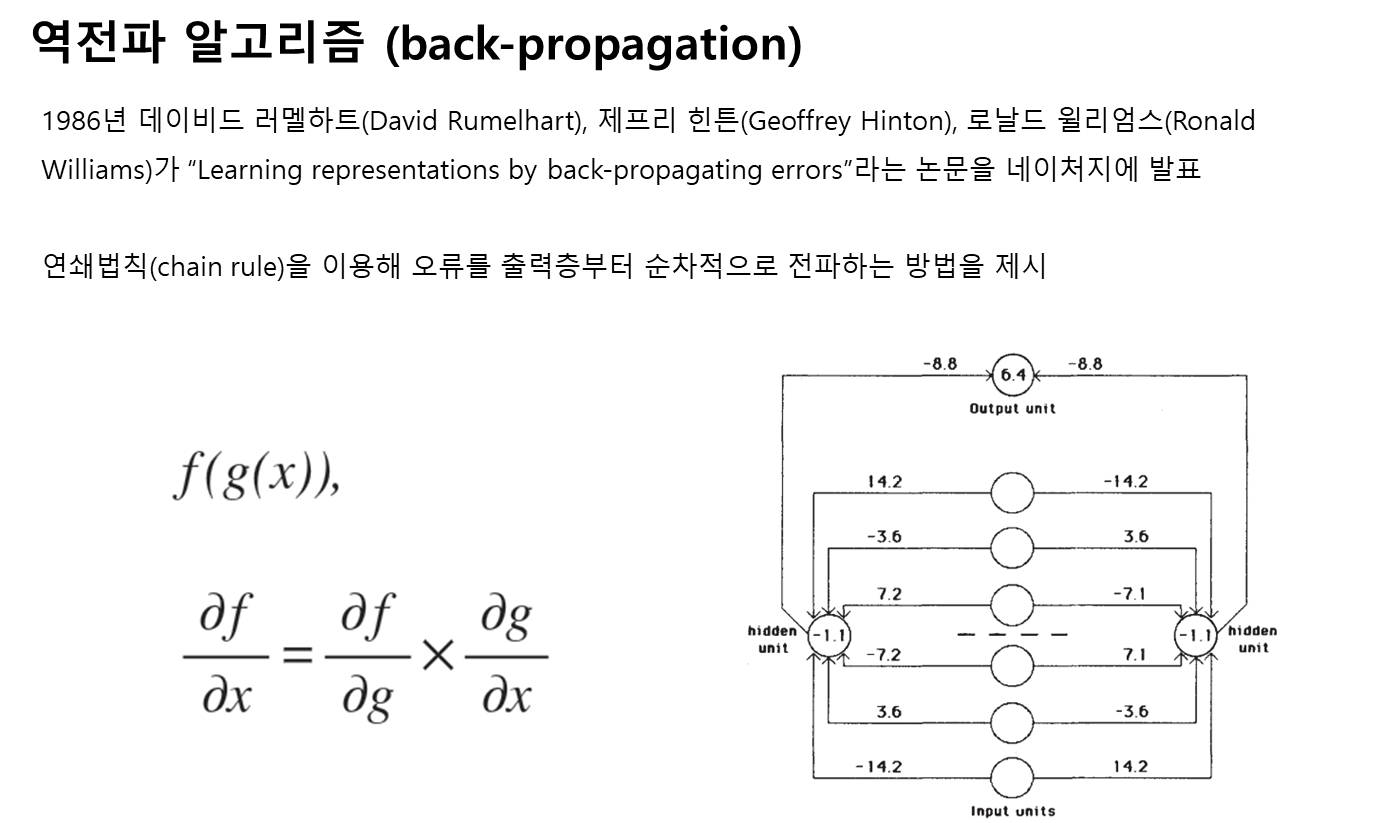

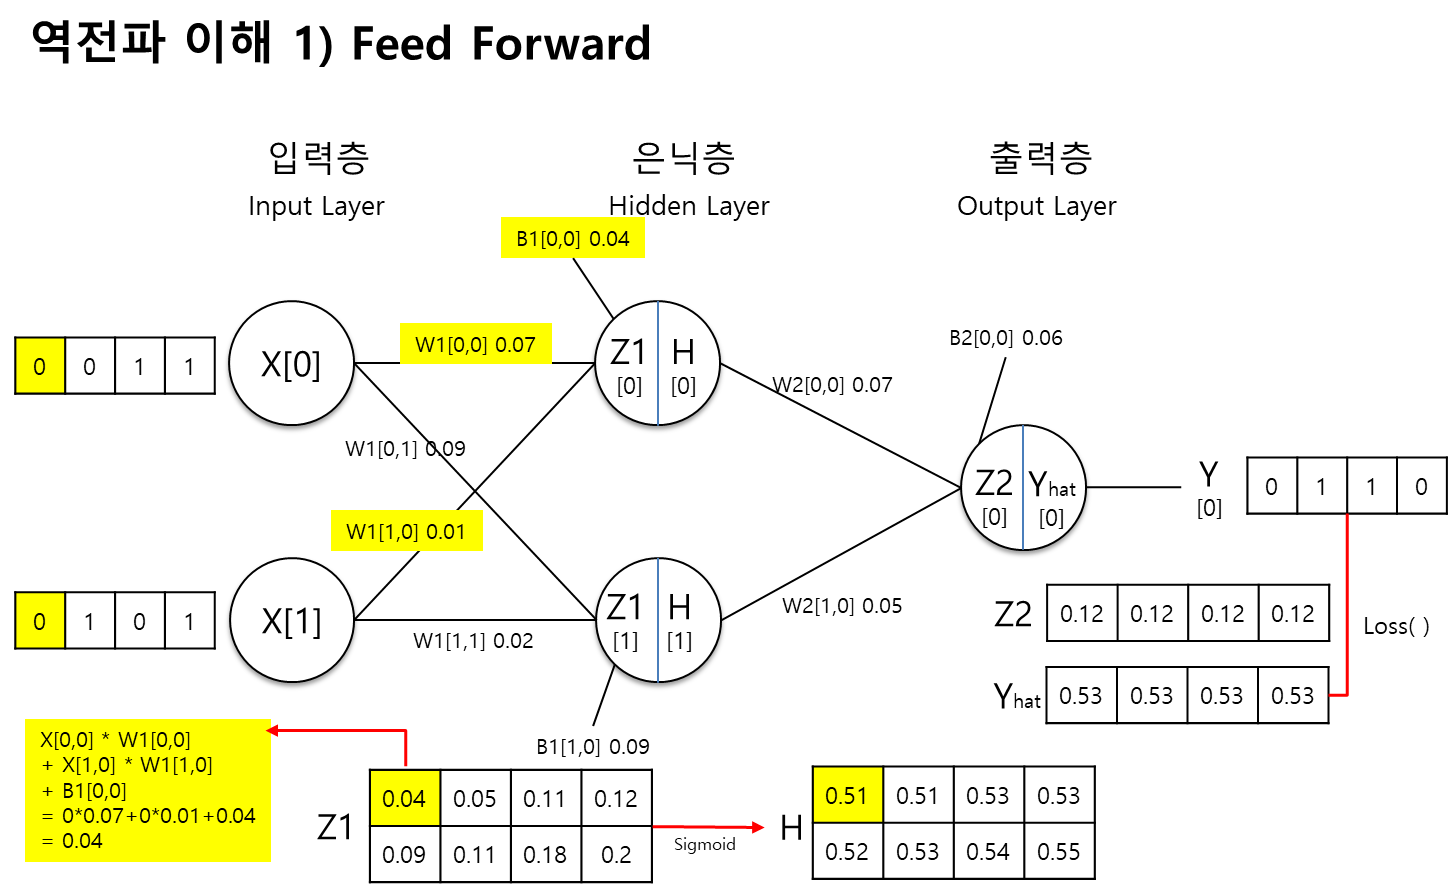

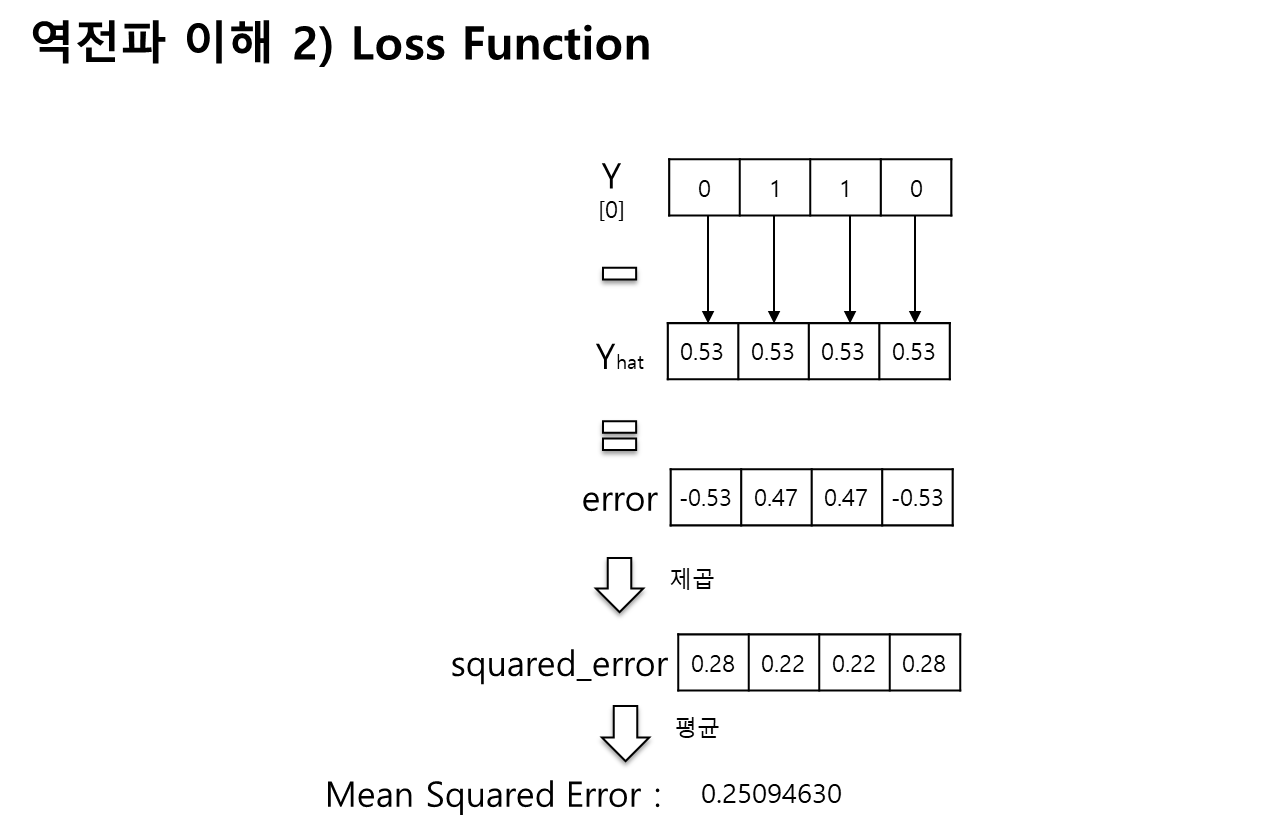

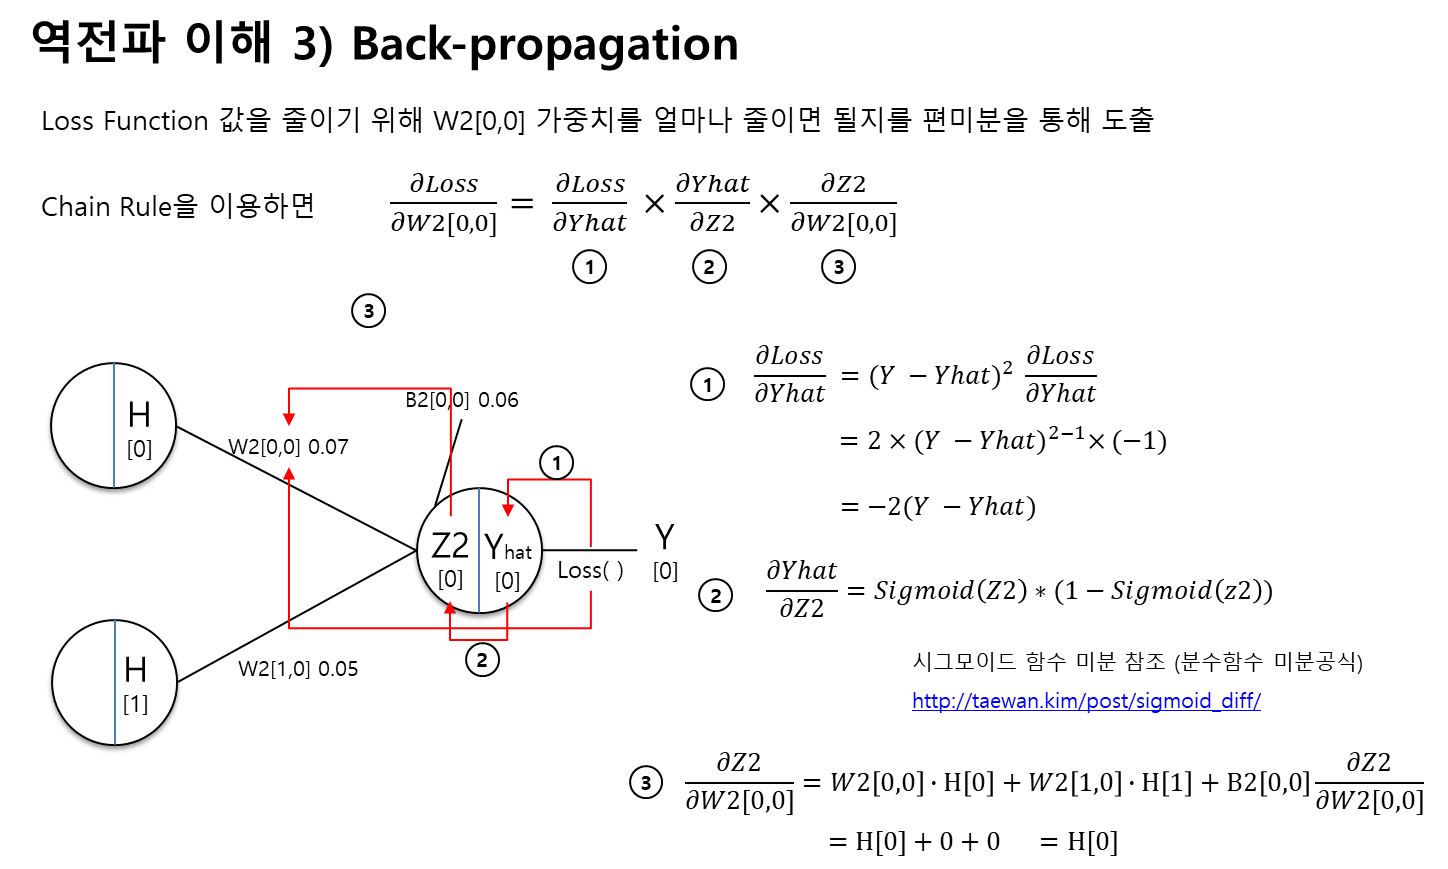

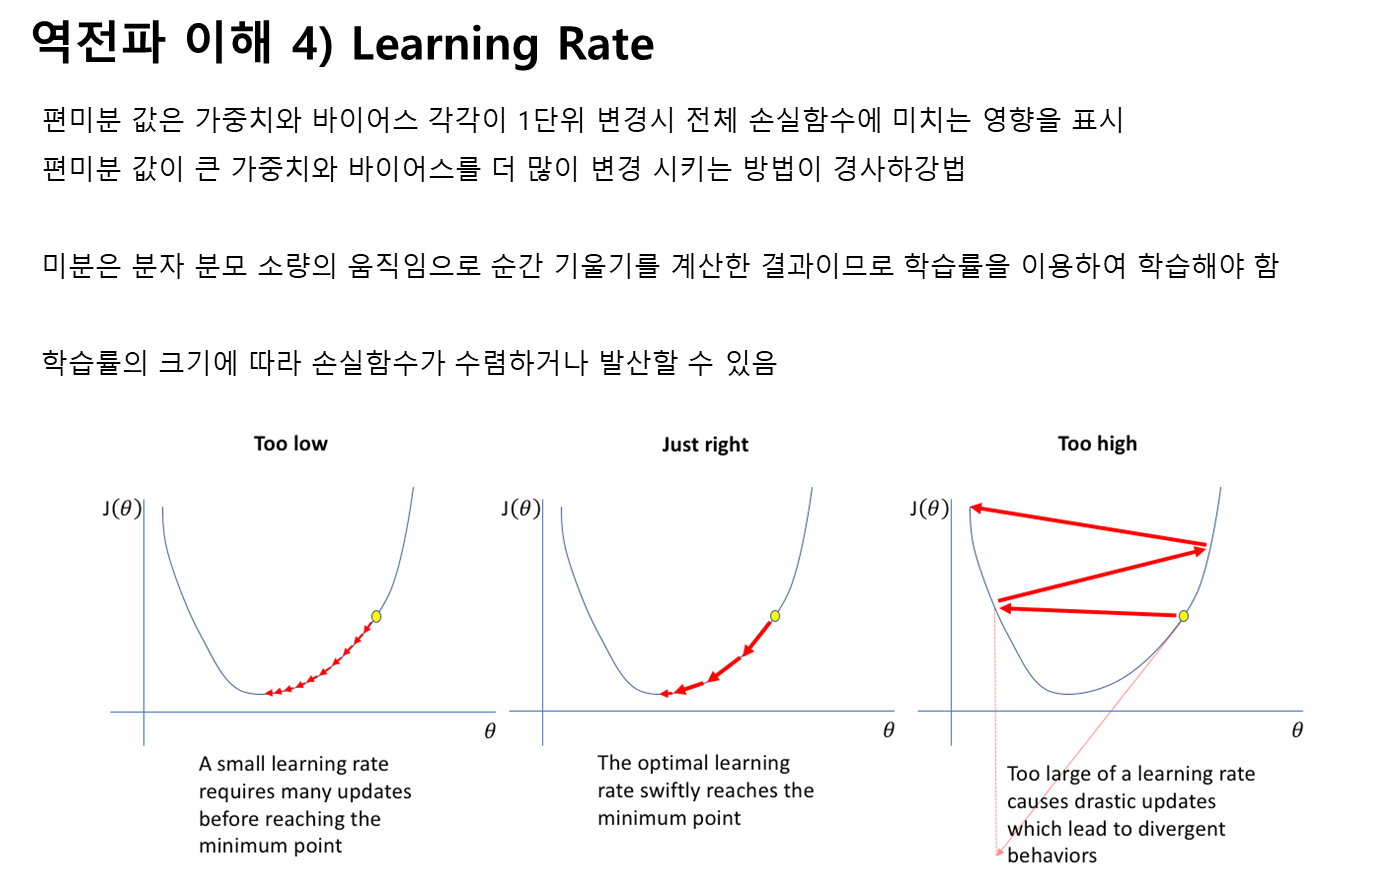

In [ ]:
"""
@author: Bigvalue_Bigdata Lab

작성자 : 구름
목적 : 다층 퍼셉트론의 학습방법에 대한 이해를 위해 작성
XOR연산을 구현하기위해 은닉노드 2개와 출력노드 1개로 구성된 다층 퍼셉트론 생성 후
시그모이드 함수를 이용한 FeedForward와 Backpropagation 과정 학습
반복 학습을 통한 네트워크 학습 과정 확인

https://haningya.tistory.com/295
소스 참고
"""

import sys
import numpy as np
from matplotlib import pyplot as plt

ds=[[0,0,0],[0,1,1],[1,0,1],[1,1,0]] #XOR

"""데이터 재구성"""
nds = np.array(ds)  # 넘파이로 변환

X = nds[:, :2].T.reshape(2, 4)  # x1,x2만 잘라내고 전치행렬로 뒤집어서 배열 재구성
Y = nds[:, 2:].reshape(1, 4)  # y만 잘라내고 배열 재구성
del nds

# %%

"""초기 가중치와 바이어스 세팅 (고정)"""
W1 = np.array([[0.07, 0.09], [0.01, 0.02]])
B1 = np.array([[0.04], [0.09]])
W2 = np.array([[0.07], [0.05]])
B2 = np.array([[0.06]])


In [ ]:

"""함수 선언"""
# 입력값과 가중치를 곱한 후 바이어스와 함께 합함
def affine(W, X, B):
    return np.dot(W.T, X) + B


# 시그모이드 함수 정의
def sigmoid(o):
    return 1. / (1 + np.exp(-1 * o))


"""순전파 1회 진행"""
# 첫번째 은닉층의 2개 은닉 노드에 데이터 전달
Z1 = affine(W1, X, B1)
H = sigmoid(Z1)

# 출력층 출력노드에 은닉층의 출력 정보를 전달하여 예측
Z2 = affine(W2, H, B2)
Y_hat = sigmoid(Z2)

# %%

"""손실함수 계산"""
# MSE를 활용한 손실함수 계산
error = Y - Y_hat
squared_error = np.power(error, 2)
loss = 1. / X.shape[1] * np.sum(squared_error)

# %%
""" 역전파 학습 계산 출력 노드에 대한 편미분"""
# 출력층 가중치 W2로 Loss 함수에 대한 편미분값을 연쇄법칙을 이용해 계산
dW2 = np.dot(H, (-2 * (Y - Y_hat) * sigmoid(Z2) * (1 - sigmoid(Z2))).T)

# 출력층 바이어스(절편)으로 Loss 함수에 대한 편미분 값을 연쇄 법칙을 이용해 계산
# 바이어스는 4개 값에 대해 동일하므로 평균 을 한번에 반영
# keepdims는 2차원 배열 구조를 그대로 유지시키기 위해 사용
dB2 = 1. / 4. * np.sum(-(Y - Y_hat) * sigmoid(Z2) * (1 - sigmoid(Z2)), axis=1, keepdims=True)

# 히든 노드의 학습
dH = np.dot(W2, -(Y - Y_hat) * sigmoid(Z2) * (1 - sigmoid(Z2)))

# BackPropagate: Input Layer
dZ1 = dH * H * (1 - H)
dW1 = np.dot(X, dZ1.T)
dB1 = 1. / 4. * np.sum(dZ1, axis=1, keepdims=True)

dW1, dB1, dW2, dB2
# %%
""" 학습률 정의 """
learning_rate = 0.5

W1 += learning_rate * dW1
B1 += learning_rate * dB1
W2 += learning_rate * dW2
B2 += learning_rate * dB2

# %%

"""학습 결과 보기"""
# 첫번째 은닉층의 2개 은닉 노드에 데이터 전달
Z1 = affine(W1, X, B1)
H = sigmoid(Z1)

# 출력층 출력노드에 은닉층의 출력 정보를 전달하여 예측
Z2 = affine(W2, H, B2)
Y_hat = sigmoid(Z2)

"""손실함수 계산"""
# MSE를 활용한 손실함수 계산
loss2 = 1. / X.shape[1] * np.sum(np.power(Y - Y_hat, 2))

print("학습전 손실함수 : {0:.7f} // 합습후 손실함수 : {1:.7f}".format(loss, loss2))


In [ ]:

# %%
"""학습 루프를 돌기 위해 함수 구성"""


def init_random_parameters(num_hidden=2, deviation=1):
    W1 = np.random.rand(2, num_hidden) * deviation
    B1 = np.random.random((num_hidden, 1)) * deviation
    W2 = np.random.rand(num_hidden, 1) * deviation
    B2 = np.random.random((1, 1)) * deviation
    return W1, B1, W2, B2


"""손실함수 계산"""


def loss_eval(_params):
    W1, B1, W2, B2 = _params

    # Forward: input Layer
    Z1 = affine(W1, X, B1)
    H = sigmoid(Z1)

    # Forward: Hidden Layer
    Z2 = affine(W2, H, B2)
    Y_hat = sigmoid(Z2)

    loss = 1. / X.shape[1] * np.sum(np.power(Y - Y_hat, 2))  # MSE

    return Z1, H, Z2, Y_hat, loss


# loss_eval ([W1, B1, W2, B2])[-1]

def get_gradients(_params):
    W1, B1, W2, B2 = _params
    m = X.shape[1]

    Z1, H, Z2, Y_hat, loss = loss_eval([W1, B1, W2, B2])

    # BackPropagate: Hidden Layer
    dW2 = np.dot(H, (-2 * (Y - Y_hat) * sigmoid(Z2) * (1 - sigmoid(Z2))).T)  # MSE

    dB2 = 1. / 4. * np.sum(-(Y - Y_hat) * sigmoid(Z2) * (1 - sigmoid(Z2)), axis=1, keepdims=True)

    dH = np.dot(W2, -(Y - Y_hat) * sigmoid(Z2) * (1 - sigmoid(Z2)))

    # BackPropagate: Input Layer
    dZ1 = dH * H * (1 - H)
    dW1 = np.dot(X, dZ1.T)
    dB1 = 1. / 4. * np.sum(dZ1, axis=1, keepdims=True)

    return [dW1, dB1, dW2, dB2], loss


def printProgress(iteration, total, prefix='', suffix='', decimals=1, barLength=100):
    formatStr = "{0:." + str(decimals) + "f}"
    percent = formatStr.format(100 * (iteration / float(total)))
    filledLength = int(round(barLength * iteration / float(total)))
    bar = '#' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percent, '%', suffix)),
    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()


def optimize(_params, learning_rate=0.1, iteration=1000, sample_size=0):
    # params = np.copy(_params)
    params = _params

    loss_trace = []

    for epoch in range(iteration):

        dparams, loss = get_gradients(params)

        for param, dparam in zip(params, dparams):
            param += - learning_rate * dparam

        if (epoch % 1000 == 0):
            loss_trace.append(loss)
            printProgress(epoch, iteration, '학습진행', 'loss = ' + str(loss), 1, 20)

    _, _, _, Y_hat_predict, _ = loss_eval(params)

    return params, loss_trace, Y_hat_predict


# %%
"""실제 학습 진행"""
# [W1, B1, W2, B2] = init_random_parameters()
new_params, loss_trace, Y_hat_predict = optimize([W1, B1, W2, B2], learning_rate, 100000)

# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()

print(Y_hat_predict)

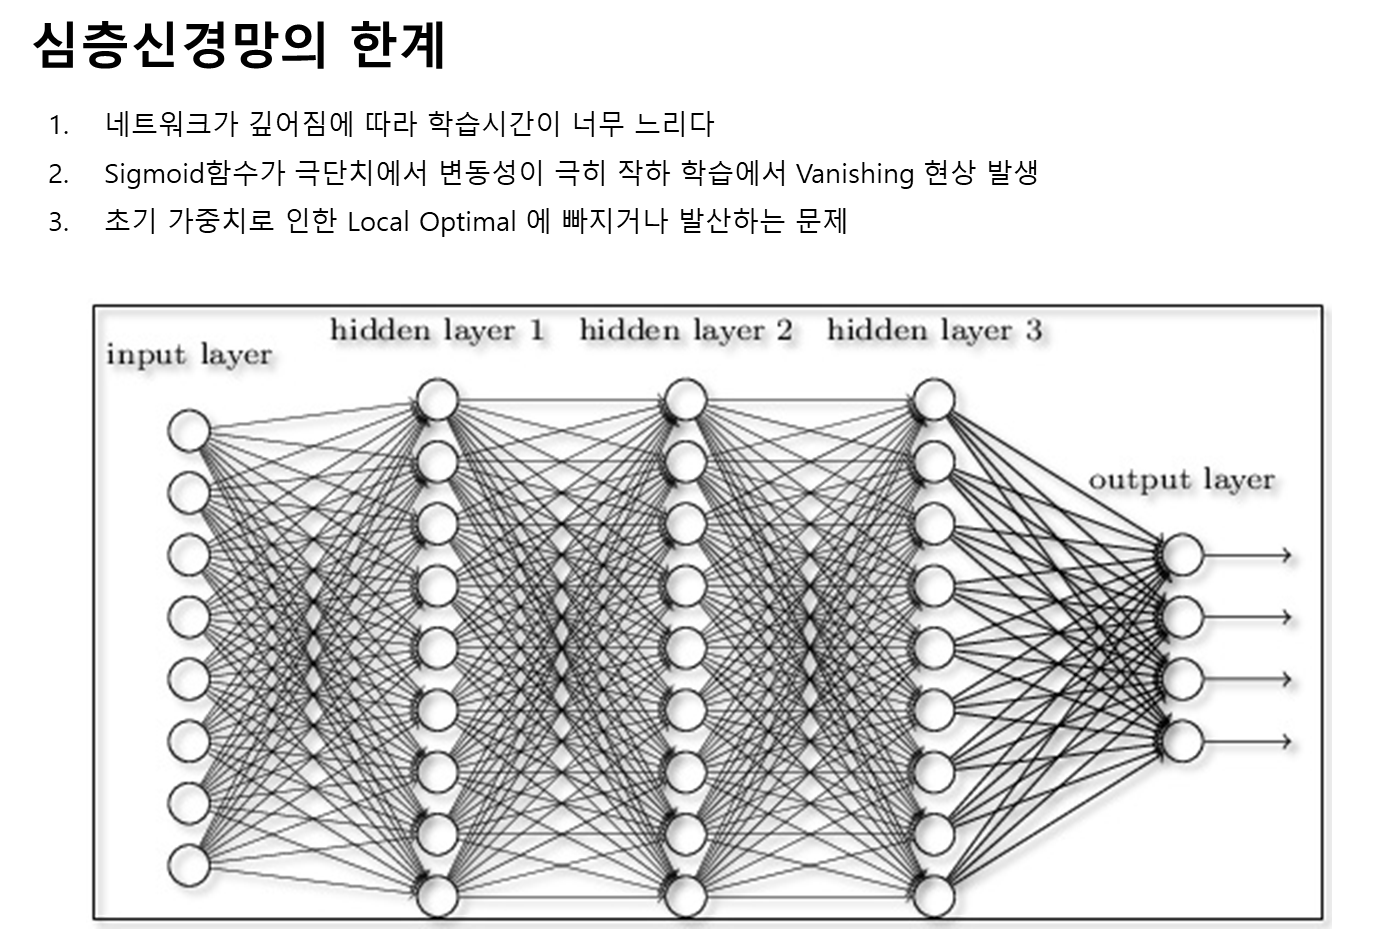